# 1. 데이터 전처리
## 1-1. 라이브러리 및 데이터 로드

In [ ]:
pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from datetime import datetime 

In [ ]:
train = pd.read_csv('train.csv', encoding='cp949')
print(train.shape), display(train.head(3))

(1205, 12)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560
2,2016-02-03,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573


(None, None)

In [ ]:
test = pd.read_csv('test.csv', encoding='cp949')
print(test.shape), display(test.head(3))

(50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


(None, None)

In [ ]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.head(2)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0


## 1-2. 컬럼명 변경하기
1) 본사정원수 => 정원수

2) 본사휴가자수 => 휴가자수

3) 본사출장자수 => 출장자수

4) 본사시간외근무명령서승인건수 => 야근수

5) 현본사소속재택근무자수 => 재택근무자수

In [ ]:
train.rename(columns = {'본사정원수' : '정원수', '본사휴가자수' : '휴가자수',
                        '본사출장자수' : '출장자수', '본사시간외근무명령서승인건수' :  '야근수',
                        '현본사소속재택근무자수' :  '재택근무자수'}, inplace=True)
train.head(2)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560


## 1-3. 컬럼 생성하기
1) '식사가능인원'

2) '연도', '월', '일'


In [ ]:
train['식사가능인원'] = train['정원수'] - train['휴가자수'] - train['출장자수'] - train[
    '재택근무자수']

In [ ]:
train[['연도', '월', '일']] = train['일자'].str.split('-', expand=True)
train.head(3)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,2401,2016,02,01
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,2378,2016,02,02
2,2016-02-03,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573,2365,2016,02,03


## 1-4. 불필요한 컬럼 삭제
 : 조식메뉴

In [ ]:
train.drop(columns=['조식메뉴'], inplace=True)

# 2. 날씨관련 데이터와 상관관계 확인하기
- 추가 데이터 : 기온, 습도, 강수량
- 생성 데이터 : 불쾌지수
- 데이터 출처 : https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do?pgmNo=179

In [ ]:
# 온도데이터 불러오기
temp = pd.read_csv('16년부터 21년까지 기온.csv', encoding='cp949')
temp = temp.head(2191)
temp.shape

(2191, 9)

In [ ]:
# 습도데이터 불러오기
humid = pd.read_csv('16년부터 21년까지 습도.csv', encoding='cp949')
humid = humid.head(2191)
humid.shape

(2191, 5)

In [ ]:
# 불쾌지수 컬럼 생성하기
# 코드 참고 : https://dacon.io/competitions/official/235743/codeshare/3003?page=1&dtype=recent

angry = []
for i in range(len(temp)):
    t = temp.iloc[i, 3]
    rh = humid.iloc[i, 3]
    angindex = 9 / 5 * t - 0.55 * (1 - rh / 100) * (9 / 5 * t - 26) + 32
    angry.append(angindex)
temp['불쾌지수'] = angry
temp = temp.rename(columns={'일시': '일자'})
train_weather = pd.merge(train, temp.iloc[:, [2, 9]], on='일자', how='left')

In [ ]:
train_weather = pd.merge(train_weather, temp.iloc[:, [2, 4, 6]], on='일자', how='left')
train_weather.head(3)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃)
0,2016-02-01,월,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,2401,2016,02,01,39.275534,5.0,-4.1
1,2016-02-02,화,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,2378,2016,02,02,36.562925,6.2,-9.1
2,2016-02-03,수,2601,56,180,111,0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573,2365,2016,02,03,35.796707,7.7,-9.3


In [ ]:
rain = pd.read_csv('16년부터 21년까지 강수량.csv', encoding='cp949')
rain = rain.rename(columns={'일시': '일자', '강수량(mm)': 'rain'})
rain = rain.fillna(0)
rain.head(3)

,\t지점번호,지점명,일자,rain,1시간최다강수량(mm),1시간최다강수량시각
0,\t192,진주,2016-01-01,0.0,0.0,0
1,\t192,진주,2016-01-02,0.0,0.0,0
2,\t192,진주,2016-01-03,0.0,0.0,0


In [ ]:
train_weather = pd.merge(train_weather, rain.iloc[:, [2, 3]], on='일자', how='left')
train_weather.head(3)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain
0,2016-02-01,월,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,2401,2016,02,01,39.275534,5.0,-4.1,0.0
1,2016-02-02,화,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,2378,2016,02,02,36.562925,6.2,-9.1,0.0
2,2016-02-03,수,2601,56,180,111,0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573,2365,2016,02,03,35.796707,7.7,-9.3,0.0


In [ ]:
train_weather.corr()

,정원수,휴가자수,출장자수,야근수,재택근무자수,중식계,석식계,식사가능인원,불쾌지수,최고기온(℃),최저기온(℃),rain
정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.503771,0.070706,0.062000,0.079941,0.034379
휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,-0.552661,0.219685,0.205482,0.212695,0.022678
출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,0.136389,0.108485,0.134143,0.100638,-0.024423
야근수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.309118,-0.058311,-0.055188,-0.053149,-0.007575
재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,-0.150393,-0.025736,-0.025459,-0.031830,0.015028
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,0.286810,-0.096058,-0.122591,-0.072575,0.088758
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,0.172373,0.007206,0.008034,0.003260,0.027613
식사가능인원,0.503771,-0.552661,0.136389,0.309118,-0.150393,0.286810,0.172373,1.000000,-0.121523,-0.124890,-0.101150,0.011491
불쾌지수,0.070706,0.219685,0.108485,-0.058311,-0.025736,-0.096058,0.007206,-0.121523,1.000000,0.956074,0.976952,0.167374
최고기온(℃),0.062000,0.205482,0.134143,-0.055188,-0.025459,-0.122591,0.008034,-0.124890,0.956074,1.000000,0.901720,0.065174


## 2-1. 아이디어 회의 중 나왔던 예측 확인해보기
- 계절
    - 2,3월에 중식계 인원 수가 많은 것 : 추워서 사람들이 안 나간 것일까?


In [ ]:
# 최저온도가 가장 낮은 날들의 중식계 인원 수를 비교해보자.
# 어떻게 비교하면 좋을까?
# => [계절] 컬럼을 만들고 '겨울'의 가장 따듯했던 날과 가장 추웠던 날들의 평균 중식계 인원 수를 비교해보자 !

# 1. [계절] 컬럼 생성하기
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일자       1205 non-null   object 
 1   요일       1205 non-null   object 
 2   정원수      1205 non-null   int64  
 3   휴가자수     1205 non-null   int64  
 4   출장자수     1205 non-null   int64  
 5   야근수      1205 non-null   int64  
 6   재택근무자수   1205 non-null   int64  
 7   중식메뉴     1205 non-null   object 
 8   석식메뉴     1205 non-null   object 
 9   중식계      1205 non-null   int64  
 10  석식계      1205 non-null   int64  
 11  식사가능인원   1205 non-null   int64  
 12  연도       1205 non-null   object 
 13  월        1205 non-null   object 
 14  일        1205 non-null   object 
 15  불쾌지수     1204 non-null   float64
 16  최고기온(℃)  1205 non-null   float64
 17  최저기온(℃)  1205 non-null   float64
 18  rain     1205 non-null   float64
dtypes: float64(4), int64(8), object(7)
memory usage: 188.3+ KB


In [ ]:
# object 형식의 '월' 컬럼을 int 타입으로 바꾸기
train_weather['월'] = train_weather['월'].astype(int)

In [ ]:
# 계절함수 생성하고 적용하기
def get_season(월):
    if 월 in [3, 4, 5]:
        return '봄'
    elif 월 in [6, 7, 8]:
        return '여름'
    elif 월 in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

train_weather['계절'] = train_weather['월'].apply(get_season)
train_weather.head(2)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절
0,2016-02-01,월,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,2401,2016,2,01,39.275534,5.0,-4.1,0.0,겨울
1,2016-02-02,화,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,2378,2016,2,02,36.562925,6.2,-9.1,0.0,겨울


In [ ]:
# 계절이 '겨울'인 값 중, 최고온도가 가장 높은 20일 추출하기
겨울 = train_weather[train_weather['계절']=='겨울']
겨울_따듯 = 겨울.sort_values('최고기온(℃)', ascending=False).head(100)
겨울_따듯

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절
985,2020-02-14,금,2872,160,273,0,0,김밥볶음밥 (쌀:국내산) 미니짬뽕 크림새우 하와이안샐러드 또띠아칩 배추겉절이...,쌀밥/잡곡밥 (쌀:국내산) 김치찌개 수제돈가스&소스 (돼지고기:국내산) 맛살냉채 ...,776,436,2439,2020,2,14,49.930688,19.2,3.7,0.0,겨울
220,2016-12-22,목,2705,118,242,32,0,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 쇠고기버섯볶음 양배추쌈*쌈장 오이무침 포기...,작은밥 (쌀:국내산) 바지락수제비 사천식탕수육 메추리알조림 귤 배추겉절이 (...,524,213,2345,2016,12,22,53.717335,18.5,5.6,11.0,겨울
691,2018-12-04,화,2846,64,246,802,0,쌀밥/잡곡밥 차돌박이찌개 유린기 모듬버섯볶음 도라지초무침 배추겉절이 (김치...,토마토스파게티 (쌀:국내산) 옥수수스프 굴소스볶음밥 쇠고기퀘사디아 키위드레싱샐...,911,617,2536,2018,12,04,56.302560,18.2,9.4,12.0,겨울
745,2019-02-25,월,2806,122,214,752,0,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 버섯불고기 두부양념조림 참나물 포기김치...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 류산슬 돈육잡채 물파래무침 포기김치 (김...,1299,645,2470,2019,2,25,47.706360,17.5,-1.7,0.0,겨울
959,2020-01-07,화,2821,95,204,448,7,쌀밥/잡곡밥 (쌀:국내산) 미역국 순살파닭 감자채전 오이도라지무침 포기김치 ...,참치주먹밥 (쌀:국내산) 우동 새우까스*칠리소스 고구마샐러드 단무지무침 포기...,904,490,2515,2020,1,07,50.107936,17.3,4.5,40.3,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2018-12-26,수,2846,184,241,0,0,쌀밥/잡곡밥 (쌀:국내산) 아욱국 돈육굴소스볶음 골뱅이무침*소면 얼갈이나물 ...,자기계발의날,695,0,2421,2018,12,26,47.569298,10.8,1.4,0.0,겨울
482,2018-01-17,수,2655,70,223,0,0,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거 마늘쫑볶음 요플레 포기김치 (김...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 삼겹살구이 어묵볶음 쫑상추무침 포기김치 ...,969,466,2362,2018,1,17,41.340470,10.7,0.7,4.1,겨울
701,2018-12-18,화,2846,87,243,525,0,쌀밥/잡곡밥 (쌀:국내산) 연두부탕 닭볶음탕 해물김치전 물파래무침 배추겉절이...,충무김밥 (쌀:국내산) 김치말이국수 오징어초무침 꽃맛살샐러드 귤 석박지 (김...,813,432,2516,2018,12,18,38.736725,10.7,-4.4,0.0,겨울
1200,2021-01-20,수,2983,75,198,4,391,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093,421,2319,2021,1,20,36.570560,10.6,-9.7,0.0,겨울


In [ ]:
# 계절이 '겨울'인 값 중, 최저온도가 가장 낮은 20일 추출하기
겨울 = train_weather[train_weather['계절']=='겨울']
겨울_추워 = 겨울.sort_values('최고기온(℃)').head(100)
겨울_추워

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절
1192,2021-01-08,금,2983,255,218,0,373,쌀밥/흑미밥/찰현미밥 콩나물맑은국 매운소고기낙지볶음 메추리알짜장떡볶이 양배추쌈*쌈장...,흑미밥 감자양파국 돈육김치볶음 팽이버섯채소전 미나리나물무침 깍두기,726,250,2137,2021,1,08,27.740680,-1.9,-15.4,0.0,겨울
487,2018-01-24,수,2655,51,224,0,0,짜장덮밥 (쌀:국내산) 맑은국 과일탕수육 개성감자만두 단무지 배추겉절이 (김...,쌀밥/잡곡밥 (쌀:국내산) 근대국 안동찜닭 마파두부 청경채무침 깍두기 (김치...,845,274,2380,2018,1,24,34.599630,-1.6,-9.9,0.0,겨울
1191,2021-01-07,목,2983,98,182,413,421,쌀밥/수수밥/찰현미밥 아욱된장국 목살스테이크 참치채소볶음 무쌈채소말이 포기김치 양상...,흑미밥 고추장찌개 (New)인절미치킨 베이컨숙주볶음 상추무침 포기김치,1040,342,2282,2021,1,07,31.920504,-1.3,-12.1,0.0,겨울
496,2018-02-06,화,2707,50,235,491,0,쌀밥/잡곡밥 (쌀:국내산) 해물된장찌개 쇠고기장조림 참치야채전 콩나물무침 알...,낙지볶음덮밥 (쌀:국내산) 팽이장국 야채튀김 양배추샐러드 조각사과 포기김치 ...,1085,601,2422,2018,2,06,36.045165,-1.2,-10.0,0.0,겨울
488,2018-01-25,목,2655,57,225,261,0,쌀밥/잡곡밥 (쌀:국내산) 김치콩나물국 돈육굴소스볶음 황태양념구이 모듬쌈 포...,야채볶음밥 (쌀:국내산) 짬뽕 수제고로케 시금치흑임자샐러드 군고구마 포기김치...,754,513,2373,2018,1,25,37.318944,-0.5,-11.6,0.0,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2016-12-19,월,2705,104,217,197,0,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 짬뽕불고기 감자채볶음 하루나겉절이 포기...,쌀밥/잡곡밥 (쌀:국내산) 육개장 탕수어 쫄면야채무침 호박나물 포기김치 (김...,1215,482,2384,2016,12,19,43.753506,7.4,1.9,11.0,겨울
963,2020-01-13,월,2821,141,218,526,0,쌀밥/잡곡밥 (쌀:국내산) 근대국 훈제오리구이 (오리고기:국내산) 마늘쫑볶음 명...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 (돼지고기:국내산) 소고기숙주볶음 (소고기:...,945,454,2462,2020,1,13,36.163376,7.4,-5.5,0.0,겨울
1204,2021-01-26,화,2983,69,183,551,362,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015,480,2369,2021,1,26,40.990585,7.4,1.5,10.3,겨울
740,2019-02-18,월,2806,104,195,728,0,쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개 (돈육:국내산) 치즈함박스테이크 (돈육:국내산...,쌀밥/잡곡밥 (쌀:국내산) 얼갈이국 돈육굴소스볶음 (돈육:국내산) 홍어채무침 세...,1314,678,2507,2019,2,18,42.872880,7.5,-4.4,0.0,겨울


In [ ]:
# 중식계 비교하기 (top100)
print('따듯한 날(평균최고기온:', round(겨울_따듯['최고기온(℃)'].mean(),2), ') 중식계 평균 수 : ', 겨울_따듯['중식계'].mean())
print('추운 날(평균최저기온:', round(겨울_추워['최고기온(℃)'].mean(), 2), ') 중식계 평균 수 : ', 겨울_추워['중식계'].mean())

따듯한 날(평균최고기온: 13.06 ) 중식계 평균 수 :  908.93
추운 날(평균최저기온: 4.71 ) 중식계 평균 수 :  936.47


In [ ]:
# 석식계 비교하기 (top100)
print('따듯한 날(평균최고기온:', round(겨울_따듯['최고기온(℃)'].mean(),2), ') 석식계 평균 수 : ', 겨울_따듯['석식계'].mean())
print('추운 날(평균최저기온:', round(겨울_추워['최저기온(℃)'].mean(), 2), ') 석식계 평균 수 : ', 겨울_추워['석식계'].mean())

따듯한 날(평균최고기온: 13.06 ) 석식계 평균 수 :  452.58
추운 날(평균최저기온: -6.14 ) 석식계 평균 수 :  438.08


## 2-2. 아이디어 시각화 해보기
- 한파란?
    - 	
10월~4월 사이의 기간에 다음 중 어느 하나에 해당하는 경우
- 한파주의보
    - 아침 최저기온이 전날보다 10℃ 이상 하강하여 3℃ 이하이고 평년값보다 3℃가 낮을 것으로 예상될 때
    - 아침 최저기온이 -12℃ 이하가 2일 이상 지속될 것이 예상될 때
    
- 한파 경보
    - 아침 최저기온이 전날보다 15℃ 이상 하강하여 3℃이하이고 평년값보다 3℃가 낮을 것으로 예상될 때
    - 아침 최저기온이 -15℃ 이하가 2일 이상 지속될 것이 예상될 때

In [ ]:
# 날씨정도 함수 만들기
a = '최고기온(℃)'

def get_weather(a):
    if a >= 13.06:
        return '따듯한 날'
    elif a <= 4.71:
        return '추운 날'
    else : 
        return '보통'

In [ ]:
# 데이터 프레임 만들기
겨울['날씨정도'] = 겨울[a].apply(get_weather)
겨울.head(3)

<ipython-input-28-e2b07a3dcb38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  겨울['날씨정도'] = 겨울[a].apply(get_weather)


,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,...,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절,날씨정도
0,2016-02-01,월,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,...,2401,2016,2,01,39.275534,5.0,-4.1,0.0,겨울,보통
1,2016-02-02,화,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,...,2378,2016,2,02,36.562925,6.2,-9.1,0.0,겨울,보통
2,2016-02-03,수,2601,56,180,111,0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,...,2365,2016,2,03,35.796707,7.7,-9.3,0.0,겨울,보통


In [ ]:
겨울['날씨정도'].unique()

array(['보통', '따듯한 날', '추운 날'], dtype=object)

In [ ]:
b = '최저기온(℃)'
def cold_wave(b):
    if b <= -15:
        return '한파경보'
    elif b <= -12:
        return '한파'
    else: 
        return '안전'

겨울['날씨경보'] = 겨울['최저기온(℃)'].apply(cold_wave)

<ipython-input-30-6fb7f7cef312>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  겨울['날씨경보'] = 겨울['최저기온(℃)'].apply(cold_wave)


In [ ]:
겨울_식사 = 겨울.groupby('날씨정도')[['중식계', '석식계']].mean().reset_index()
겨울_식사.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날씨정도    3 non-null      object 
 1   중식계     3 non-null      float64
 2   석식계     3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


In [ ]:
겨울.shape

(295, 22)

In [ ]:
len(겨울[겨울['날씨경보']=='한파경보'])

1

In [ ]:
len(겨울[겨울['날씨경보']=='한파'])

5

In [ ]:
len(겨울[겨울['날씨경보']=='안전'])

289

Text(0.5, 1.0, '겨울날씨별 중식계 평균 수')

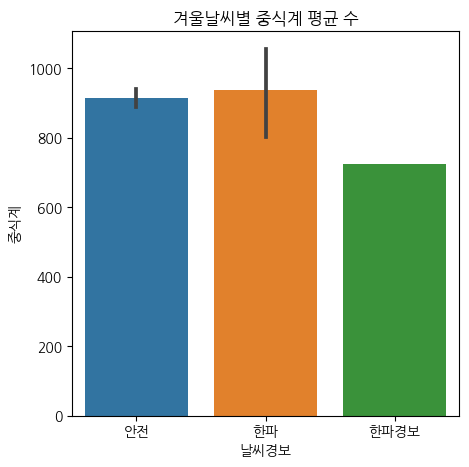

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(겨울, x='날씨경보', y = '중식계')
plt.title('겨울날씨별 중식계 평균 수')

Text(0.5, 1.0, '겨울날씨별 석식계 평균 수')

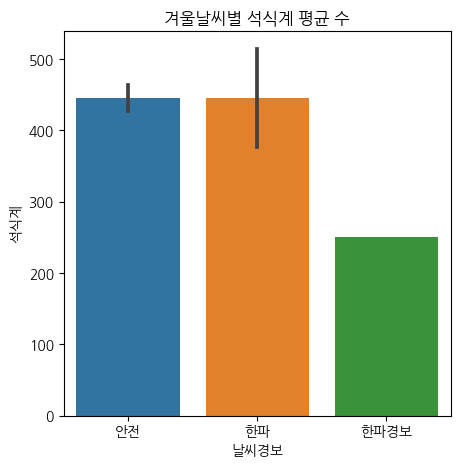

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(겨울, x='날씨경보', y = '석식계')
plt.title('겨울날씨별 석식계 평균 수')

## 2-2. 여름 데이터도 해보기.
- 일반적으로 일 최고기온이 33℃이상일 때를 폭염이라고 하며, 국내에서는 일 최고기온이 33℃이상이 2일 이상 지속될 때는 주의보, 35℃이상이 2일 이상 지속될 때는 경보를 발령하고 있습니다.

In [ ]:
# 계절이 '여름'인 값 중, 최고온도가 가장 높은 100일 추출하기
여름 = train_weather[train_weather['계절']=='여름']
여름_무더위 = 여름.sort_values('최고기온(℃)', ascending=False).head(100)

# 최고기온 top100의 평균기온 구하기
round(여름_무더위['최고기온(℃)'].mean(),2)

34.09

In [ ]:
# 계절이 '여름'인 값 중, 최고온도가 가장 낮은 100일 추출하기
여름_덜더움 = 여름.sort_values('최고기온(℃)').head(100)

# 최고기온 하위 100의 평균기온 구하기
round(여름_덜더움['최고기온(℃)'].mean(),2)

26.02

In [ ]:
# 날씨정도 함수 만들기
# a = '최고기온(℃)'

# def get_summer(a):
#     if a >= 33:
#         return '폭염'
#     elif a <= 26.02:
#         return '선선한 날'
#     else : 
#         return '보통'

In [ ]:
여름.iloc[0, 16]

26.3

In [ ]:
# 전날 최고기온 컬럼 생성하기

# 여름['전날최고기온'] = 여름[a].shift(1)
# 여름.head(2)

In [ ]:
# a = '최고기온(℃)'

# def summer_hot(a):
#     for i in range(1, len(str(a))):
#         current_row = 여름.iloc[i, 16]
#         previous_row = 여름.iloc[i-1, 16]
#         if current_row>= 35 and previous_row>=35:
#             print('폭염경보')
#         elif current_row >= 33 and previous_row >= 33:
#             print('폭염주의보')
#         elif current_row >= 33:
#             print('폭염')
#         else : print('안전')

In [ ]:
from IPython.display import display
pd.options.display.max_rows = None

display(여름)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절
80,2016-06-01,수,2637,75,245,0,0,열무비빔밥 (쌀:국내산) 강된장찌개 오징어튀김 궁중떡볶이 음료 포기김치 (김...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 고추장불고기 (돼지고기:국내산) 감자채햄볶음 ...,916,490,2317,2016,6,01,66.208304,26.3,15.1,0.0,여름
81,2016-06-02,목,2637,81,258,301,0,쌀밥/잡곡밥 (쌀:국내산) 오이미역냉국 모둠장조림 (쇠고기:호주산) 두부구이 실...,날치알볶음밥 (쌀:국내산) 유부장국 고추잡채*꽃빵 (쇠고기:호주산) 땅콩조림 오...,850,483,2298,2016,6,02,64.079160,27.3,10.9,0.0,여름
82,2016-06-03,금,2637,191,268,64,0,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 찜닭 (닭고기:국내산) 김...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 수제돈까스 단호박범벅/오이피클 주꾸미무침 ...,721,548,2178,2016,6,03,66.442185,28.3,12.1,0.0,여름
83,2016-06-07,화,2637,115,192,389,0,쌀밥/잡곡밥 (쌀:국내산) 북어계란국 돈육굴소스볶음 홍어채무침 가지나물 포기...,콩나물밥*양념장 (쌀:국내산) 가쯔오장국 미트볼케찹조림 계란찜 마늘쫑무침 포...,1244,629,2330,2016,6,07,68.457941,26.7,17.4,0.0,여름
84,2016-06-08,수,2637,58,240,0,0,쌀밥/잡곡밥 (쌀:국내산) 참치김치찌개 순살깐풍기 맛살콩나물냉채 브로컬리초장 ...,쌀밥/잡곡밥 (쌀:국내산) 육개장 자반고등어구이 우엉잡채 상추겉절이 포기김치...,931,500,2339,2016,6,08,68.822400,24.6,17.9,0.0,여름
85,2016-06-09,목,2637,69,252,359,0,쌀밥/잡곡밥 (쌀:국내산) 매운콩나물국 돼지갈비찜 부추전 비름나물 포기김치 ...,충무김밥 열무물국수 오징어무침 야채튀김 방울토마토 석박지 (김치:국내산),829,506,2316,2016,6,09,69.400727,28.2,18.1,0.0,여름
86,2016-06-10,금,2637,151,270,61,0,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 오징어볶음 모둠소시지구이 치커리사과무침 ...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 버섯불고기 두부조림 참나물 포기김치 (김치...,697,509,2216,2016,6,10,70.227125,28.6,17.8,0.0,여름
87,2016-06-13,월,2637,98,209,415,0,쌀밥/잡곡밥 (쌀:국내산) 북어콩나물국 제육볶음 참치야채전 모둠쌈 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 들깨버섯탕 삼치데리야끼구이 햄맛살볶음 아삭고추무침 ...,1243,590,2330,2016,6,13,71.454312,28.5,20.5,0.0,여름
88,2016-06-14,화,2637,56,241,432,0,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 닭양념조림 탕평채 어묵볶음 열무김치 (...,오므라이스 (쌀:국내산) 미소장국 훈제오리냉채 군만두 수박 포기김치 (김치:...,973,593,2340,2016,6,14,70.892880,28.0,20.1,0.0,여름
89,2016-06-15,수,2637,60,260,0,0,카레덮밥 (쌀:국내산) 맑은국 떡갈비조림 쫄면무침 열무된장나물 포기김치 (김...,쌀밥/잡곡밥 (쌀:국내산) 닭개장 해물청경채볶음 계란말이 오이도라지생채 포기...,984,535,2317,2016,6,15,69.840466,24.2,18.5,0.0,여름


In [ ]:
여름.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 80 to 1109
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일자       307 non-null    object 
 1   요일       307 non-null    object 
 2   정원수      307 non-null    int64  
 3   휴가자수     307 non-null    int64  
 4   출장자수     307 non-null    int64  
 5   야근수      307 non-null    int64  
 6   재택근무자수   307 non-null    int64  
 7   중식메뉴     307 non-null    object 
 8   석식메뉴     307 non-null    object 
 9   중식계      307 non-null    int64  
 10  석식계      307 non-null    int64  
 11  식사가능인원   307 non-null    int64  
 12  연도       307 non-null    object 
 13  월        307 non-null    int64  
 14  일        307 non-null    object 
 15  불쾌지수     307 non-null    float64
 16  최고기온(℃)  307 non-null    float64
 17  최저기온(℃)  307 non-null    float64
 18  rain     307 non-null    float64
 19  계절       307 non-null    object 
dtypes: float64(4), int64(9), object(7)
memory usage: 50.

In [ ]:
# a_col = 여름['최고기온(℃)']
# b_col = 여름['전날최고기온']

# a_col = a_col.astype(float)
# b_col = b_col.astype(float)

# def heat_alert(a, b):
#     if all(a >= 35) and all(b >=35):
#         return '폭염경보'
#     elif all(a >= 33) and all(b >=33):
#         return '폭염주의보'
#     elif all(a >= 33):
#         return '폭염'
#     else: 
#         return '안전'
# 데이터 프레임 만들기
# 여름['날씨정도'] = 여름[a].apply(get_summer)
# 여름.head(3)

In [ ]:
def heat_alert(a):
    if a >= 35:
        return '폭염경보'
    elif a >= 33:
        return '폭염'
    else: 
        return '안전'

여름['날씨경보'] = 여름['최고기온(℃)'].apply(heat_alert)
여름.head()

<ipython-input-47-0f682e6f2715>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  여름['날씨경보'] = 여름['최고기온(℃)'].apply(heat_alert)


,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,...,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절,날씨경보
80,2016-06-01,수,2637,75,245,0,0,열무비빔밥 (쌀:국내산) 강된장찌개 오징어튀김 궁중떡볶이 음료 포기김치 (김...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 고추장불고기 (돼지고기:국내산) 감자채햄볶음 ...,916,...,2317,2016,6,01,66.208304,26.3,15.1,0.0,여름,안전
81,2016-06-02,목,2637,81,258,301,0,쌀밥/잡곡밥 (쌀:국내산) 오이미역냉국 모둠장조림 (쇠고기:호주산) 두부구이 실...,날치알볶음밥 (쌀:국내산) 유부장국 고추잡채*꽃빵 (쇠고기:호주산) 땅콩조림 오...,850,...,2298,2016,6,02,64.079160,27.3,10.9,0.0,여름,안전
82,2016-06-03,금,2637,191,268,64,0,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 찜닭 (닭고기:국내산) 김...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 수제돈까스 단호박범벅/오이피클 주꾸미무침 ...,721,...,2178,2016,6,03,66.442185,28.3,12.1,0.0,여름,안전
83,2016-06-07,화,2637,115,192,389,0,쌀밥/잡곡밥 (쌀:국내산) 북어계란국 돈육굴소스볶음 홍어채무침 가지나물 포기...,콩나물밥*양념장 (쌀:국내산) 가쯔오장국 미트볼케찹조림 계란찜 마늘쫑무침 포...,1244,...,2330,2016,6,07,68.457941,26.7,17.4,0.0,여름,안전
84,2016-06-08,수,2637,58,240,0,0,쌀밥/잡곡밥 (쌀:국내산) 참치김치찌개 순살깐풍기 맛살콩나물냉채 브로컬리초장 ...,쌀밥/잡곡밥 (쌀:국내산) 육개장 자반고등어구이 우엉잡채 상추겉절이 포기김치...,931,...,2339,2016,6,08,68.822400,24.6,17.9,0.0,여름,안전


In [ ]:
여름_식사 = 여름.groupby('날씨경보')[['중식계', '석식계']].mean().reset_index()
여름_식사.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날씨경보    3 non-null      object 
 1   중식계     3 non-null      float64
 2   석식계     3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


In [ ]:
여름.shape

(307, 21)

In [ ]:
len(여름[여름['날씨경보']=='폭염경보'])

26

In [ ]:
len(여름[여름['날씨경보']=='폭염'])

49

In [ ]:
len(여름[여름['날씨경보']=='안전'])

232

Text(0.5, 1.0, '여름날씨별 중식계 평균 수')

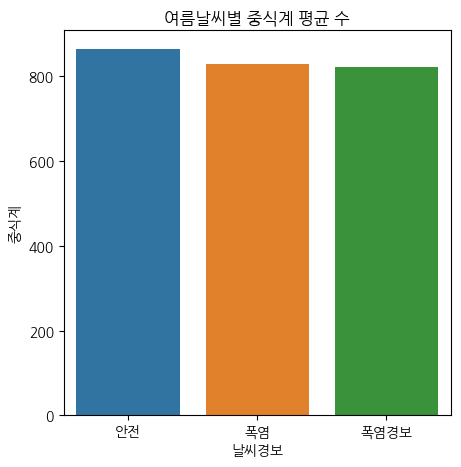

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(여름_식사, x='날씨경보', y = '중식계')
plt.title('여름날씨별 중식계 평균 수')

Text(0.5, 1.0, '여름날씨별 석식계 평균 수')

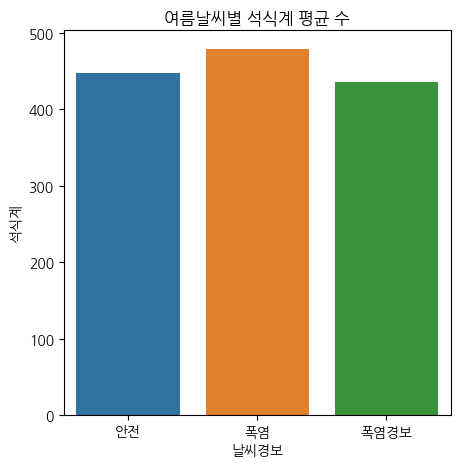

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(여름_식사, x='날씨경보', y = '석식계')
plt.title('여름날씨별 석식계 평균 수')

## 2-3. 여름데이터 불쾌지수로 해보기.

In [ ]:
여름_매우불쾌 = 여름.sort_values('불쾌지수', ascending=False).head(100)
round(여름_매우불쾌['불쾌지수'].mean(),2)

79.27

In [ ]:
여름_상쾌 = 여름.sort_values('불쾌지수').head(100)
round(여름_상쾌['불쾌지수'].mean(),2)

68.88

In [ ]:
# 날씨정도 함수 만들기
a = '불쾌지수'

def get_bad(a):
    if a >= 79.27:
        return '매우 불쾌'
    elif a <= 68.88:
        return '비교적 상쾌'
    else : 
        return '덜 불쾌'

In [ ]:
# 데이터 프레임 만들기
여름['불쾌정도'] = 여름[a].apply(get_bad)
여름.head(3)

<ipython-input-58-92c206da4e0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  여름['불쾌정도'] = 여름[a].apply(get_bad)


,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,...,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절,날씨경보,불쾌정도
80,2016-06-01,수,2637,75,245,0,0,열무비빔밥 (쌀:국내산) 강된장찌개 오징어튀김 궁중떡볶이 음료 포기김치 (김...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 고추장불고기 (돼지고기:국내산) 감자채햄볶음 ...,916,...,2016,6,01,66.208304,26.3,15.1,0.0,여름,안전,비교적 상쾌
81,2016-06-02,목,2637,81,258,301,0,쌀밥/잡곡밥 (쌀:국내산) 오이미역냉국 모둠장조림 (쇠고기:호주산) 두부구이 실...,날치알볶음밥 (쌀:국내산) 유부장국 고추잡채*꽃빵 (쇠고기:호주산) 땅콩조림 오...,850,...,2016,6,02,64.079160,27.3,10.9,0.0,여름,안전,비교적 상쾌
82,2016-06-03,금,2637,191,268,64,0,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 찜닭 (닭고기:국내산) 김...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 수제돈까스 단호박범벅/오이피클 주꾸미무침 ...,721,...,2016,6,03,66.442185,28.3,12.1,0.0,여름,안전,비교적 상쾌


In [ ]:
len(여름[여름['불쾌정도']=='매우 불쾌'])

49

In [ ]:
len(여름[여름['불쾌정도']=='덜 불쾌'])

216

In [ ]:
len(여름[여름['불쾌정도']=='비교적 상쾌'])

42

Text(0.5, 1.0, '여름 불쾌지수별 중식계 평균 수')

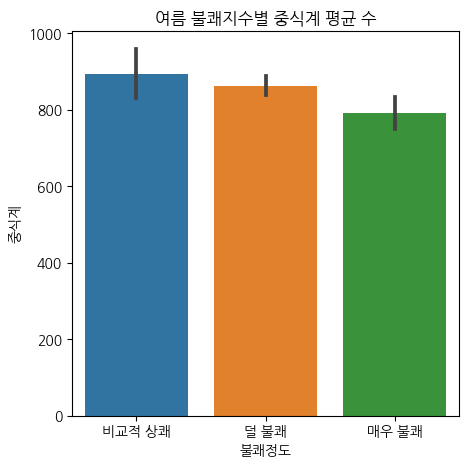

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(여름, x='불쾌정도', y = '중식계')
plt.title('여름 불쾌지수별 중식계 평균 수')

Text(0.5, 1.0, '여름 불쾌지수별 석식계 평균 수')

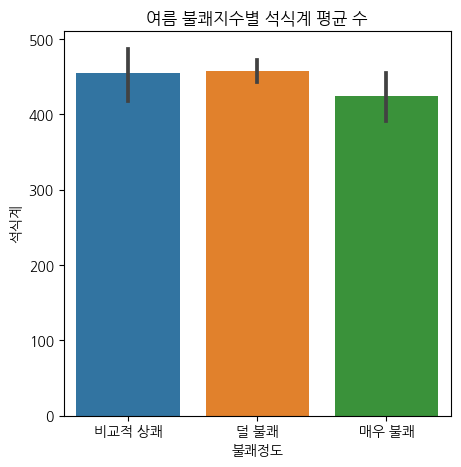

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(여름, x='불쾌정도', y = '석식계')
plt.title('여름 불쾌지수별 석식계 평균 수')

In [ ]:
# 기온으로 보았을 때는 석식의 차이가 없었지만 불쾌지수로 보았을 때, 매우 불쾌한 날에는 석식 비율이 적다.
# 정말 에어컨이 잘 작동하지 않는 것이 아닐까..

## 2-4. 강수량 데이터 확인해보기
- 기상청에서는 강수 표현을 약한 비, (보통) 비, 강한 비, 매우 강한 비로 나누어 표현하는데요. 
    - 약한 비는 1시간에 3mm 미만 
    - 보통 비는 1시간에 3~15mm 미만
    - 강한 비는 1시간에 15mm 이상
    - 매우 강한 비는 1시간에 30mm 이상을 의미합니다.

- 약한 비(0), 보통 비(1), 강한 비(2), 매우 강한 비(3)으로 표현

In [ ]:
train_weather[train_weather['rain'] != 0.0]

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절
6,2016-02-12,금,2601,389,156,93,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909,598,2056,2016,2,12,49.183040,14.4,5.8,62.8,겨울
20,2016-03-04,금,2624,83,247,79,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 부대찌개 가자미튀김 메추리알조림 열무된장나...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어국 미트볼조림 옥수수전 부추생채 포...",837,673,2294,2016,3,04,47.477112,9.7,6.6,36.1,봄
22,2016-03-08,화,2624,47,212,426,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 고등어김치말이 ...","카레덮밥 (쌀,현미흑미:국내산) 가쯔오장국 수제고로케*케찹 과일샐러드 오복지 ...",1026,609,2365,2016,3,08,48.626620,11.3,3.4,3.3,봄
23,2016-03-09,수,2624,43,225,0,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 북어국 돈육장조림 (돼지고기:국내산) 홍어무침...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 생선까스*탈탈소스 야채계란찜 콩나물무...",901,523,2356,2016,3,09,45.331968,12.6,1.2,6.8,봄
30,2016-03-18,금,2624,118,277,57,0,쌀밥/잡곡밥 (쌀:국내산) 시금치국 훈제오리구이 연근땅콩조림 쌈무/부추생채 ...,쌀밥/잡곡밥 (쌀:국내산) 닭곰탕 (닭고기:국내산) 임연수찜 어묵곤약볶음 돌나물초...,757,521,2229,2016,3,18,50.131986,12.1,7.9,27.6,봄
35,2016-03-25,금,2624,98,275,59,0,쌀밥/잡곡밥 (쌀:국내산) 닭개장 (닭고기:국내산) 자반고등어구이 (고등어:국내산...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장찌개 누룽지탕수육 (돼지고기:국내산) 감자채볶음...,861,523,2251,2016,3,25,46.449856,11.5,4.1,2.8,봄
41,2016-04-04,월,2643,62,221,367,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 순두부찌개 쇠불고기 브로컬리맛살볶음 풋마늘...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 된장찌개 고등어조림 고기전 부추생채 포기...",1237,614,2360,2016,4,04,52.741372,13.8,9.8,2.6,봄
43,2016-04-06,수,2643,37,249,0,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 올갱이아욱국 제육볶음 두부조림 모둠쌈*쌈장...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 매운버섯국 찜닭 탕평채 청경채생채 포기김...",876,492,2357,2016,4,06,54.158918,20.5,5.2,26.1,봄
44,2016-04-07,목,2643,47,258,339,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 어묵국 매운돼지갈비찜 해물파전 무생채 포...","김밥 (쌀,현미흑미:국내산) 우동 야채튀김 조각사과 오복지 포기김치 (배추,...",853,524,2338,2016,4,07,54.348850,17.6,8.6,28.7,봄
47,2016-04-12,화,2643,76,225,239,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 부대찌개 쇠고기단호박조림 (쇠고기:호주산) 열...","치킨마요덮밥 (닭,쌀:국내산) 유부주머니국 떡볶이 단무지무침 오렌지 포기김치...",771,500,2342,2016,4,12,53.906810,18.6,4.3,3.1,봄


In [ ]:
# 강수량 함수 만들기
# 약한 비(0), 보통 비(1), 강한 비(2), 매우 강한 비(3)으로 표현

def get_rain(rain):
    if rain >= 30:
        return 3
    elif rain >= 15:
        return 2
    elif rain >= 3:
        return 1
    else : 
        return 0

In [ ]:
train_weather['강수량정도'] = train_weather['rain'].apply(get_rain)
train_weather.head(2)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택근무자수,중식메뉴,석식메뉴,중식계,...,식사가능인원,연도,월,일,불쾌지수,최고기온(℃),최저기온(℃),rain,계절,강수량정도
0,2016-02-01,월,2601,50,150,238,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,...,2401,2016,2,01,39.275534,5.0,-4.1,0.0,겨울,0
1,2016-02-02,화,2601,50,173,319,0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,...,2378,2016,2,02,36.562925,6.2,-9.1,0.0,겨울,0


In [ ]:
len(train_weather[train_weather['강수량정도']==0])

1014

In [ ]:
len(train_weather[train_weather['강수량정도']==1])

94

In [ ]:
len(train_weather[train_weather['강수량정도']==2])

47

In [ ]:
len(train_weather[train_weather['강수량정도']==3])

50

Text(0.5, 1.0, '강수량 정도별 중식계 평균 수')

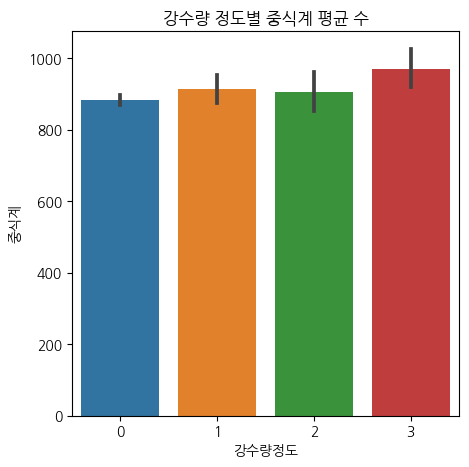

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(train_weather, x='강수량정도', y = '중식계')
plt.title('강수량 정도별 중식계 평균 수')

Text(0.5, 1.0, '강수량 정도별 석식계 평균 수')

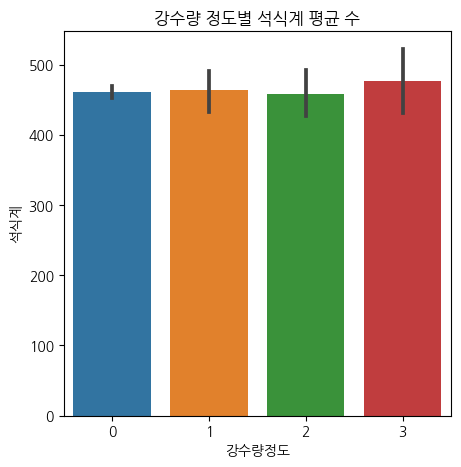

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(train_weather, x='강수량정도', y = '석식계')
plt.title('강수량 정도별 석식계 평균 수')

In [ ]:
train_weather = train_weather.drop(columns='강수량정도')

In [ ]:
train_weather.iloc[:, [0,15,16, 17, 18, 19]]

,일자,불쾌지수,최고기온(℃),최저기온(℃),rain,계절
0,2016-02-01,39.275534,5.0,-4.1,0.0,겨울
1,2016-02-02,36.562925,6.2,-9.1,0.0,겨울


In [ ]:
train_weather.iloc[:, [0,15,16, 17, 18, 19]].to_csv('train_weather.csv', index=False, encoding='cp949')